
**Python Blok Projesi**<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>

<p>Nobel Ödülü belki de dünyanın en tanınmış bilimsel ödülüdür. Her yıl kimya, edebiyat, fizik, tıp, ekonomi ve barış alanlarında bilim insanlarına ve akademisyenlere verilmektedir. Bu projede, Nobel Ödülü kazananları inceleyeceğiz. </p>

## Proje Soruları

1. Nobel Ödüllerini en çok kazanan ilk on ülkeyi bulunuz.
2. Nobel Ödüllerini kazanan ilk kadınları listeleyiniz.
3. Nobel Ödüllerini kazanan ilk erkekleri listeleyiniz.
4. Nobel ödülünü en çok kazanan ülkenin hangi yıldan itibaren hakimiyet sağladığını görselleştirip bu hakimiyette rol oynayan şeyler nelerdir? İçgörülerinizi paylaşır mısınız?
5. Nobel Ödülü kazananların cinsiyetlerini, yaşlarını, ödül kategorisi ve yılları kullanarak görselleştiriniz.(Her bir ödül kategorisi için ayrı grafik gösteriniz) Çıkan sonuçlara göre görseli yorumlayınız.
6. 1938-1945 yılı arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.
7. 1947-1991 yılları arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.(Her kategori için ayrı bir grafik olması istenmektedir)
8. Kimya, Edebiyat, Barış, Fizik ve Tıp kategorilerindeki 2000 sonrasındaki kişilerin ülkelerini, yaşlarını görselleştirin.(Her bir Kategori için ayrı görselleştirme yapılması istenmektedir) Veriyi yorumlayınız.


### - Kütüpheneleri Yüklüyoruz

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Nobel.csv'den yüklediğimiz veriyi dataframe'e çevirip df değişkenine atıyoruz.
df=df1=pd.read_csv("nobel.csv")

### -Veri Setini Tanıma

In [3]:
#VERİ SETİNDEKİ DEĞİŞKENLERİ İNCELİYORUZ.(Değişkenler kendi içerisinde anlam içeriyormu onları bire bir inceliyoruz.)
#year from 1901 to 2016 toplam 113 yıl var 1940,1941,1942 yılları eksiktir.Büyük ihtimal ikinci dünya savaşı etkisi nedeniyle eksik
#category ['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics','Economics'] 6 kategori var
#prize ödül demektir
#motivation hangi alanda başarılı görüldüğü anlamını taşıyor
#prize share 4 çeşittir ['1/1', '1/2', '1/4', '1/3'] ödülün kaçta kaçını aldığını gösterir
#laureate_id unique 904 adet saydım.911 satır veri var.yani bir kişi bir den fazla nobel almış olabilir.null değer bu kolonda yok
#laureate_type Individual', 'Organization' iki çeşittir.bir bireysel diğeri bir kuruluşu temsil eder
#full name tam ismi verir.toplam 904 benzersiz değer var 911-904 7 kişi birden fazla ödül almış olabilir
#birth_date doğum yılı
#birth_city doğduğu şehir 601 farklı şehirde doğanlar ödül almış
#birth_country doğduğu ülke toplam 122 farklı ülkeden ödül alınmış
#sex cinsiyeti belirtir
#organization_name 296 farklı kuruluş bu sutünda bulunmaktadır.Örn berlin UNİVERSITY
#organization_city kuruluşun bulunduğu şehiri ifade eder 182 tane şehir var kuruluşun bulunduğu şehir sayısı
#organization_country 30 farklı ülke ödül almış
#death_date ölüm tarihi
#death_city öldüğü şehir
#death_country öldüğü şehir

In [4]:
#Veri setini tanıyoruz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [5]:
#birth_date kolonunun veri tipini date olarak değiştiriyoruz
df['birth_date'] = pd.to_datetime(df['birth_date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  911 non-null    int64         
 1   category              911 non-null    object        
 2   prize                 911 non-null    object        
 3   motivation            823 non-null    object        
 4   prize_share           911 non-null    object        
 5   laureate_id           911 non-null    int64         
 6   laureate_type         911 non-null    object        
 7   full_name             911 non-null    object        
 8   birth_date            883 non-null    datetime64[ns]
 9   birth_city            883 non-null    object        
 10  birth_country         885 non-null    object        
 11  sex                   885 non-null    object        
 12  organization_name     665 non-null    object        
 13  organization_city   

In [7]:
#İlk 5 satırı inceliyoruz.
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [8]:
#unique değerler inceleniyor
df.nunique()

year                    113
category                  6
prize                   579
motivation              565
prize_share               4
laureate_id             904
laureate_type             2
full_name               904
birth_date              868
birth_city              601
birth_country           121
sex                       2
organization_name       295
organization_city       181
organization_country     29
death_date              582
death_city              291
death_country            50
dtype: int64

In [9]:
#Category değişkeninde kaç tane farklı kategori olduğunu unique metodu ile buluyoruz.
df.category.unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [10]:
#toplam null değerleri buluyoruz.
df.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

### -Cinsiyet kolonundaki eksik verilerin doldurulması

In [11]:
# Boş cinsiyet satırlarının tespit edilmesi
df.loc[df['sex'].isnull()]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Boş cinsiyet değerlerinin other olarak doldurulması
df.loc[df['sex'].isnull(),'sex'] = 'Other'

In [13]:
# Boş cinsiyet satırların kontrolü yapıldığında eksik verilerin dolmuş olduğu null değer kalmadığı görüldü.
df.loc[df['sex'].isnull()]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country


### -Birth Date kolonundaki eksik verilerin doldurulması

In [14]:
# Kişilere  ait doğum tarihi eksik olan kayıtları filtreliyoruz
individual_birth_dates = df.loc[(df['birth_date'].isnull()) & (df['laureate_type'] == 'Individual')]

# Bu kayıtların isimlerinin benzersiz olanlarını tespit ediyoruz
unique_organizations = individual_birth_dates['full_name'].unique()

# Sonucu yazdırıyoruz
print(unique_organizations)


['Venkatraman Ramakrishnan' 'Saul Perlmutter']


In [15]:
#Burada leureate type Individual olanları bir gözle kontrol ediyoruz.Birth_date kolonlarının nan olduğu görülüyor
df.loc[(df["full_name"]=='Venkatraman Ramakrishnan')|(df["full_name"]=='Saul Perlmutter')]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
816,2009,Chemistry,The Nobel Prize in Chemistry 2009,"""for studies of the structure and function of ...",1/3,841,Individual,Venkatraman Ramakrishnan,NaT,"Chidambaram, Tamil Nadu",India,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,NaN,NaN,NaN
850,2011,Physics,The Nobel Prize in Physics 2011,"""for the discovery of the accelerating expansi...",1/2,864,Individual,Saul Perlmutter,NaT,"Champaign-Urbana, IL",United States of America,Male,Lawrence Berkeley National Laboratory,"Berkeley, CA",United States of America,NaN,NaN,NaN


### Bu alanda eksikleri dolduruyoruz

In [16]:
# Eksik doğum tarihlerini internetten bulup ekliyoruz
individiual_empty_birth_dates = ['1952-04-01','1959-09-22']
df.loc[(df['birth_date'].isnull()) & (df['laureate_type'] == 'Individual'), 'birth_date'] = individiual_empty_birth_dates

In [17]:
#Burada eksik olan birth_date kolonlarının doldurulmuş oduğunu gördük
df.loc[(df["full_name"]=='Venkatraman Ramakrishnan')|(df["full_name"]=='Saul Perlmutter')]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
816,2009,Chemistry,The Nobel Prize in Chemistry 2009,"""for studies of the structure and function of ...",1/3,841,Individual,Venkatraman Ramakrishnan,1952-04-01,"Chidambaram, Tamil Nadu",India,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,NaN,NaN,NaN
850,2011,Physics,The Nobel Prize in Physics 2011,"""for the discovery of the accelerating expansi...",1/2,864,Individual,Saul Perlmutter,1959-09-22,"Champaign-Urbana, IL",United States of America,Male,Lawrence Berkeley National Laboratory,"Berkeley, CA",United States of America,NaN,NaN,NaN


In [18]:
# Şirketlere ait doğum tarihi eksik olan kayıtları filtreliyoruz
organizationsss_birth_date_organizations = df.loc[(df['birth_date'].isnull()) & (df['laureate_type'] == 'Organization')]

# Bu kayıtların isimlerinin benzersiz olanlarını buluyoruz
unique_organizations = organizationsss_birth_date_organizations['full_name'].unique()

# Sonuçları yazdırıyoruz
print(unique_organizations)


['Institut de droit international (Institute of International Law)'
 'Bureau international permanent de la Paix (Permanent International Peace Bureau)'
 'Comité international de la Croix Rouge (International Committee of the Red Cross)'
 'Office international Nansen pour les Réfugiés (Nansen International Office for Refugees)'
 'Friends Service Council (The Quakers)'
 'American Friends Service Committee (The Quakers)'
 'Office of the United Nations High Commissioner for Refugees (UNHCR)'
 'Ligue des Sociétés de la Croix-Rouge (League of Red Cross Societies)'
 "United Nations Children's Fund (UNICEF)"
 'International Labour Organization (I.L.O.)' 'Amnesty International'
 'International Physicians for the Prevention of Nuclear War'
 'United Nations Peacekeeping Forces'
 'Pugwash Conferences on Science and World Affairs'
 'International Campaign to Ban Landmines (ICBL)'
 'Médecins Sans Frontières' 'United Nations (U.N.)'
 'International Atomic Energy Agency (IAEA)' 'Grameen Bank'
 'Interg

In [19]:
# birth_date kolonunda  şirketlere ait eksik verileri buluyoruz .
df.loc[(df['birth_date'].isnull()) & (df['laureate_type'] == 'Organization')]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaT,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaT,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaT,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaT,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaT,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaT,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:

# Şirketlerinde tarihlerini internetten bulup dataya ekliyoruz
organization_empty_birth_dates =  ["1873-09-08","1891-05-22","1863-02-17","1931-04-01","1917-12-10","1917-12-10",
                                     "1950-12-14","1919-07-15","1946-12-11","1919-04-11","1961-07-28","1980-12-10",
                                     "1948-05-29","1919-07-15","1957-07-07","1992-10-03","1971-12-20","1945-10-24",
                                     "1957-07-29","1983-10-02","1988-11-20","1993-11-01","1997-04-29","1948-05-29",
                                     "1957-07-07","1992-10-03"]
df.loc[(df['birth_date'].isnull()) & (df['laureate_type'] == 'Organization'),'birth_date'] = organization_empty_birth_dates

In [21]:
# Doğum tarihinde kalan eksikler kişiler kontrol edildiğinde sorun kalmadığı görülüyor
df.loc[(df['birth_date'].isnull()) & (df['laureate_type'] == 'Organization')]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country


In [22]:
#Burada eksik olan birth_date kolonlarının doldurulmuş oduğunu gördük.Kontrol amaçlı iki kurumun adı kontrol edildi.
df.loc[(df["full_name"]=='Institut de droit international (Institute of International Law)')|(df["full_name"]=='Friends Service Council (The Quakers)')]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,1873-09-08,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),1917-12-10,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN


### Birth_country kolonundaki boş sutunların doldurulması

In [23]:
# birth_country kolonundaki boş değerlerin tespit edilmesi
df.loc[df['birth_country'].isnull()]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,1873-09-08,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,1891-05-22,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1863-02-17,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,1931-04-01,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1917-12-10,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),1917-12-10,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),1950-12-14,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,1919-07-15,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,1946-12-11,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,1919-04-11,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# 'birth_country' boş değerleri internetten bulup tamamlıyorum.
empt_birth_country = ["Belgium","Switzerland","Switzerland","Switzerland","Switzerland","United Kingdom","United States",
                       "Switzerland","Switzerland","France","United States","Switzerland","Switzerland","Switzerland",
                       "United Kingdom","Switzerland","Austria","Bangladesh","Switzerland","Belgium","Switzerland",
                       "Belgium","Switzerland","Belgium","Netherlands","Tunisia"]
df.loc[df['birth_country'].isnull(),'birth_country'] = empt_birth_country

In [25]:
# birth_country kolonundaki boş değerler kontrol edildiğinde eksik değerin kalmadığı görüldü
df.loc[df['birth_country'].isnull()]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country


### birth_city kolonundaki boş değerlerin doldurulması

In [26]:

# 'birth_city' boş değerleri buluyorum
df.loc[df['birth_city'].isnull()]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,1873-09-08,NaN,Belgium,Other,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,1891-05-22,NaN,Switzerland,Other,NaN,NaN,NaN,NaN,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1863-02-17,NaN,Switzerland,Other,NaN,NaN,NaN,NaN,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,1931-04-01,NaN,Switzerland,Other,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1917-12-10,NaN,Switzerland,Other,NaN,NaN,NaN,NaN,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),1917-12-10,NaN,United Kingdom,Other,NaN,NaN,NaN,NaN,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),1950-12-14,NaN,United States,Other,NaN,NaN,NaN,NaN,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,1919-07-15,NaN,Switzerland,Other,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,1946-12-11,NaN,Switzerland,Other,NaN,NaN,NaN,NaN,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,1919-04-11,NaN,France,Other,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# 'birth_city' boş değerleri internetten bulup dolduruyorum
empt_birth_city = ["Gent","Bern","Geneva","Geneva","Geneva","London","Philadelphia","Geneva","Geneva","Paris",
                    "New York City","Geneva","Geneva","Geneva","London","Geneva","Vienna","Dhaka","Geneva","Chaguanas",
                    "Brussels","Geneva","Brussels","Geneva","Çangçun","Brussels","The Hague","Tunis"]
df.loc[df['birth_city'].isnull(),'birth_city'] = empt_birth_city

In [28]:
# 'birth_city' kolonunda boş değerler kontrol edildiğinde boş değer kalmadığı görüldü.
df.loc[df['birth_city'].isnull()]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country


In [29]:
# birth_date,birth_city,birth_country ve sex kolonlarında veri manipulasyonu yapıldı.Eksik değerlerin tamamlandığı görüldü
df.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date                0
birth_city                0
birth_country             0
sex                       0
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

# ------------------- PROJE SORULARI VE CEVAPLARI ------------------------------------

# SORU 1: Nobel Ödüllerini en çok kazanan ilk on ülkeyi bulunuz

In [30]:
#Groupby yöntemi ile ülke içindeki isimleri gruplandırıp saydırıyoruz.
#Sonucu sort_values  yöntemi ile büyükten küçüğe sıralıyoruz
df.groupby("birth_country")["full_name"].count().sort_values(ascending=False).head(10)

birth_country
United States of America    259
United Kingdom               87
Germany                      61
France                       52
Sweden                       29
Switzerland                  29
Japan                        24
Netherlands                  19
Canada                       18
Russia                       17
Name: full_name, dtype: int64

## -----------------------------------------------------------------------------------------------------------------------------

# SORU 2:Nobel Ödüllerini kazanan ilk kadınları listeleyiniz.

In [31]:
# Cinsiyeti "Female" olanları filtreliyoruz
female_df = df[df["sex"] == "Female"]

# Bu filtrelenmiş veriyi yıla  göre sıralıyoruz
sorted_female_df = female_df.sort_values(by="year")

# Orijinal DataFrame'den indexleri seçiyoruz
result_df = df.loc[sorted_female_df.index]


In [32]:
result_df2=result_df[["year","full_name","category","birth_country"]].head(10)

In [33]:
result_df2.reset_index(drop=True)# burada indexleri düzeltip 1 den sıraladık

,year,full_name,category,birth_country
0,1903,"Marie Curie, née Sklodowska",Physics,Russian Empire (Poland)
1,1905,"Baroness Bertha Sophie Felicita von Suttner, n...",Peace,Austrian Empire (Czech Republic)
2,1909,Selma Ottilia Lovisa Lagerlöf,Literature,Sweden
3,1911,"Marie Curie, née Sklodowska",Chemistry,Russian Empire (Poland)
4,1926,Grazia Deledda,Literature,Italy
5,1928,Sigrid Undset,Literature,Denmark
6,1931,Jane Addams,Peace,United States of America
7,1935,Irène Joliot-Curie,Chemistry,France
8,1938,Pearl Buck,Literature,United States of America
9,1945,Gabriela Mistral,Literature,Chile


## ------------------------------------------------------------------------------------------------------------------------

# SORU 3: Nobel Ödüllerini kazanan ilk erkekleri listeleyiniz.

In [34]:
# Cinsiyeti "male" olanları filtreliyoruz
male_df=df[df["sex"]=="Male"]

In [35]:
# Bu filtrelenmiş veriyi yıla  göre sıralıyoruz
sorted_male_df=male_df.sort_values(by="year")

In [36]:
# Orijinal DataFrame'den indexleri seçiyoruz
result_dfm=df.loc[sorted_male_df.index]

In [37]:
result_df3=result_dfm[["full_name","category","birth_country"]].head(10)

In [38]:
result_df3.reset_index(drop=True)# burada indexleri düzeltip 1 den sıraladık

,full_name,category,birth_country
0,Jacobus Henricus van 't Hoff,Chemistry,Netherlands
1,Sully Prudhomme,Literature,France
2,Emil Adolf von Behring,Medicine,Prussia (Poland)
3,Jean Henry Dunant,Peace,Switzerland
4,Frédéric Passy,Peace,France
5,Wilhelm Conrad Röntgen,Physics,Prussia (Germany)
6,Hendrik Antoon Lorentz,Physics,Netherlands
7,Charles Albert Gobat,Peace,Switzerland
8,Élie Ducommun,Peace,Switzerland
9,Pieter Zeeman,Physics,Netherlands


## -----------------------------------------------------------------------------------------------------------------------------

# Soru 4: Nobel ödülünü en çok kazanan ülkenin hangi yıldan itibaren hakimiyet sağladığını görselleştirip bu hakimiyette rol oynayan şeyler nelerdir? İçgörülerinizi paylaşır mısınız?

### ----Önce en çok ödül alan ülkeyi kendi içinde inceleyeceğiz.Daha sonra genel tabloya bakacağız 

In [39]:
#Önce yıl ve ödül sayısını bulmak için bize yeterli olan year ve birth_country kolonlarını değişkene atıyoruz
dfz=df[["year","birth_country"]]

In [40]:
dfz_sorted = dfz.sort_values(by='year')

In [41]:
dfz_sorted.head()

,year,birth_country
0,1901,Netherlands
1,1901,France
2,1901,Prussia (Poland)
3,1901,Switzerland
4,1901,France


In [42]:
#her bir ülke için detayları buluyoruz.Her yıl hangi ülkenin kaç adet ödül aldığını grupluyoruz.
award_counts_detail=dfz.groupby(["year","birth_country"]).size()
award_counts_detail.head(10)

year  birth_country      
1901  France                 2
      Netherlands            1
      Prussia (Germany)      1
      Prussia (Poland)       1
      Switzerland            1
1902  India                  1
      Netherlands            2
      Prussia (Germany)      1
      Schleswig (Germany)    1
      Switzerland            2
dtype: int64

In [43]:
#her bir ülke için detayları buluyoruz.Her yıl hangi ülkenin kaç adet ödül aldığını grupluyoruz.İndexleri düzenliyoruz
dfx = dfz.groupby(['year', 'birth_country']).size().reset_index(name='counts')

In [44]:
dfx.head(10)

,year,birth_country,counts
0,1901,France,2
1,1901,Netherlands,1
2,1901,Prussia (Germany),1
3,1901,Prussia (Poland),1
4,1901,Switzerland,1
5,1902,India,1
6,1902,Netherlands,2
7,1902,Prussia (Germany),1
8,1902,Schleswig (Germany),1
9,1902,Switzerland,2


In [45]:
#Kontrol amaçlı 1902 yılının detayına bakıyoruz.Netherlands a ait 2 adet ödül görülüyor.
dfz.loc[dfz["year"]==1902]

,year,birth_country
6,1902,Prussia (Germany)
7,1902,Schleswig (Germany)
8,1902,India
9,1902,Switzerland
10,1902,Switzerland
11,1902,Netherlands
12,1902,Netherlands


### -- Önce en çok ödül kazanan ülkenin ödül sayısını yıllara göre inceliyoruz

In [46]:
# Ülkelerin toplam Nobel ödülü sayısını hesaplama
total_awards = dfx.groupby('birth_country')['counts'].sum().reset_index()
total_awards = total_awards.sort_values(by='counts', ascending=False)
total_awards.head(10)

,birth_country,counts
118,United States of America,259
116,United Kingdom,87
44,Germany,61
40,France,52
105,Sweden,29
106,Switzerland,29
60,Japan,24
71,Netherlands,19
26,Canada,18
90,Russia,17


In [47]:
# En çok Nobel ödülü kazanan ülkeyi bulma
top_country = total_awards.iloc[0]['birth_country']
top_country

'United States of America'

In [48]:
# En çok ödül kazanan ülkenin yıllara göre ödül sayısını hesaplama
top_country_data = dfx[dfx['birth_country'] == top_country]
yearly_awards = top_country_data.groupby('year')['counts'].sum().reset_index()
yearly_awards

,year,counts
0,1906,1
1,1912,1
2,1914,1
3,1919,1
4,1923,1
...,...,...
80,2012,5
81,2013,5
82,2014,3
83,2015,1


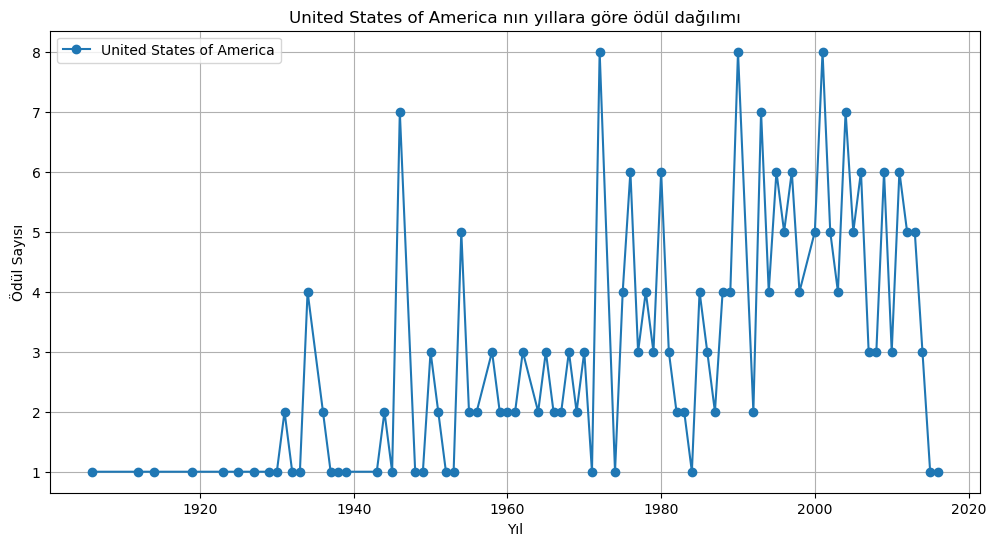

In [49]:

# En çok ödül alan ülkenin aldığı ödüllerin yıllara göre dağılım grafiği
plt.figure(figsize=(12, 6))
plt.plot(yearly_awards['year'], yearly_awards['counts'], marker='o', label=top_country)
plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.title(f'{top_country} nın yıllara göre ödül dağılımı')
plt.legend()
plt.grid(True)
plt.show()

### -Öncelikle en çok ödül alan ülke olan Amerika Birleşik Devletlerini inceliyoruz.Amerika'nın ödül sayıları nerede ciddi bir artış göstermeye başlamış onu gözlemliyoruz.İkinci dünya savaşından önce ödül sayısında bir miktar artış görülmüş ikinci dünya savaşının başlaması ödül sayısında düşüşe neden olmuş ikinci dünya savaşından sonra ise ödül sayılarında artış gözlemlenmiştir.Amerika'nın İkinci dünya savaşından sonra ödül sayısındaki artışın nedenini aşağıda genel tabloda inceleyeceğiz.

In [50]:
#Kontrol amaçlı 1946 yılının detayına bakıyoruz.United States of America nın 1946 yılında 7 adet nobel ödülü aldığını görüyoruz
#1946 yılından sonra ödül sayılarının artış eğilimi gösterdiği gözlemleniyor.
dfz.loc[dfz["year"]==1946]

,year,birth_country
224,1946,United States of America
225,1946,United States of America
226,1946,United States of America
227,1946,Germany
228,1946,United States of America
229,1946,United States of America
230,1946,United States of America
231,1946,United States of America


## Bu tabloda veriler  nobelin başladığı ilk yıldan ödül almaya başlayan ülkelere göre x ekseninde sıralanmıştır

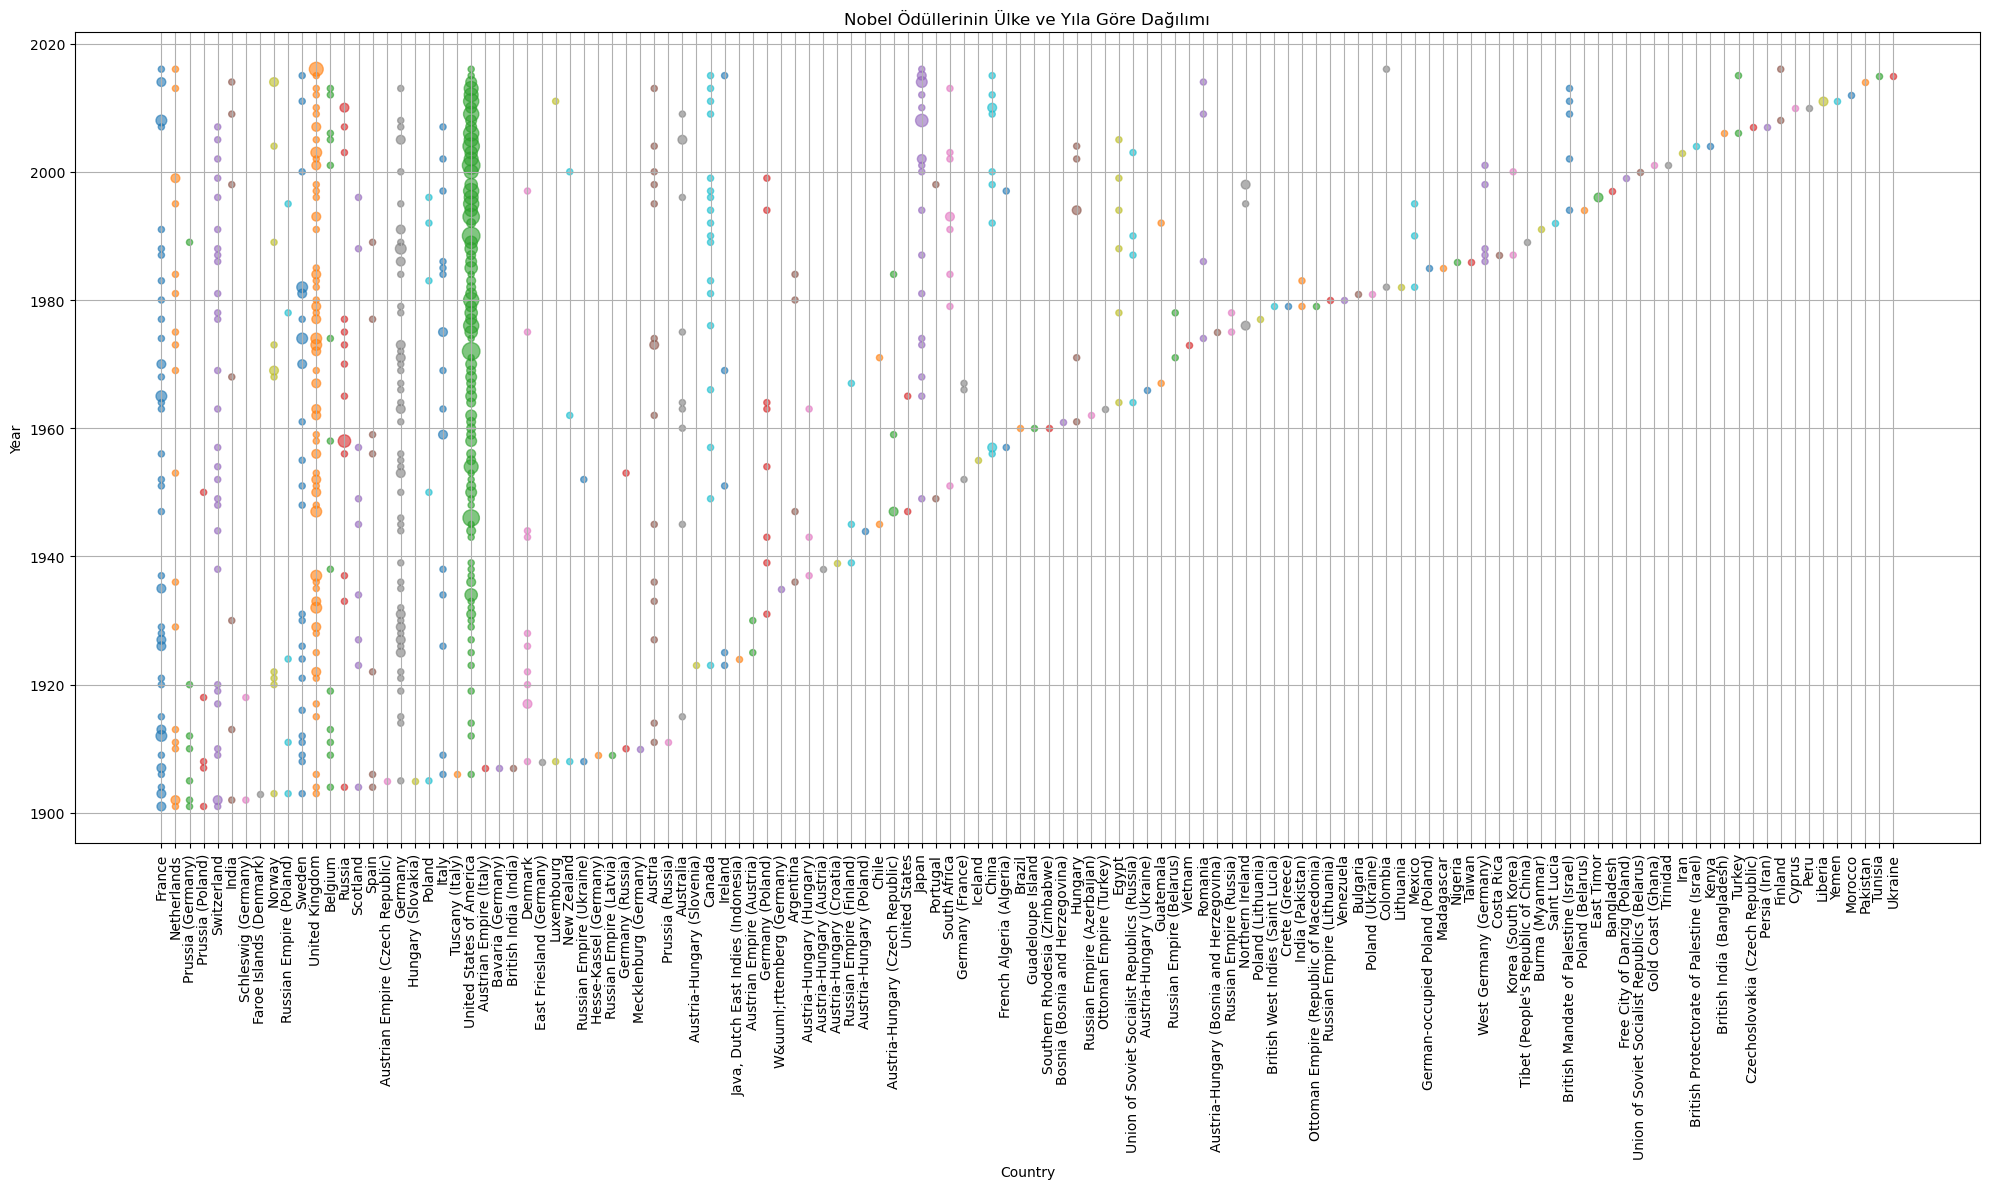

In [51]:

# Ülkeleri y eksenine yerleştirmek için benzersiz ülke isimlerini alma ve indeksleme
countries = dfx['birth_country'].unique()
country_indices = {country: i for i, country in enumerate(countries)}

# Scatter plot oluşturma
plt.figure(figsize=(20, 12))

# Scatter plot için verileri hazırlama
for country in countries:
    country_data = dfx[dfx['birth_country'] == country]
    plt.scatter([country_indices[country]] * len(country_data), country_data['year'], 
                s=country_data['counts']*20, alpha=0.6, label=country)

# X ekseni için ülke isimlerini yerleştirme
plt.xticks(range(len(countries)), countries, rotation=90)

#Başlıkları ekleme
plt.xlabel('Country')
plt.ylabel('Year')
plt.title('Nobel Ödüllerinin Ülke ve Yıla Göre Dağılımı')
plt.grid(True)
plt.tight_layout()
plt.show()


## Bu tabloda veriler x ekseninde en çok ödül alan ülkelere göre sıralanmıştır.

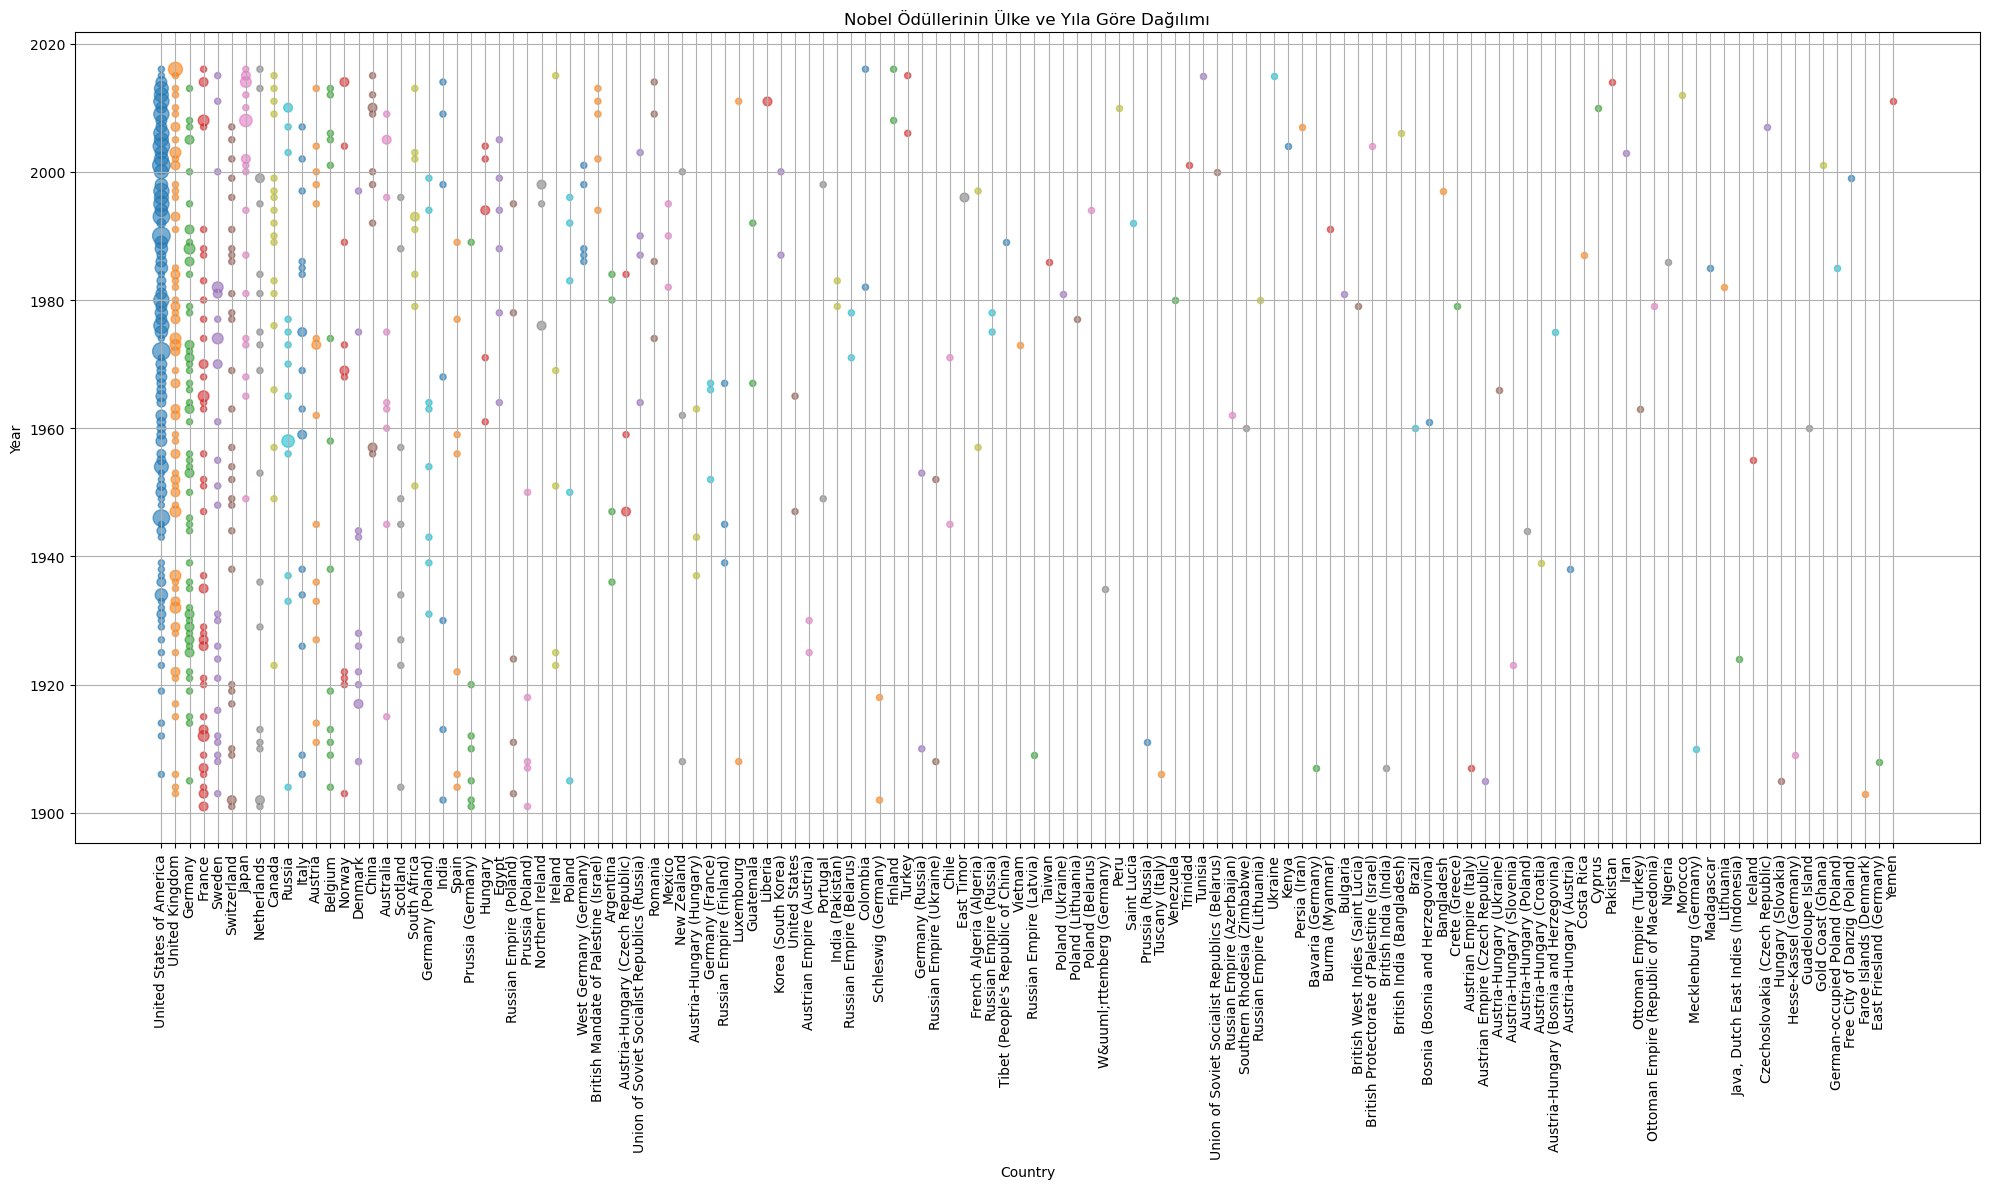

In [52]:


# Ülkelere göre toplam ödül sayılarını hesaplama
country_award_counts = dfx.groupby('birth_country')['counts'].sum()

# Ülkeleri toplam ödül sayılarına göre sıralama
sorted_countries = country_award_counts.sort_values(ascending=False).index

# Ülkelere indeks atama
country_indices = {country: i for i, country in enumerate(sorted_countries)}

# Scatter plot oluşturma
plt.figure(figsize=(20, 12))

# Scatter plot için verileri hazırlama
for country in sorted_countries:
    country_data = dfx[dfx['birth_country'] == country]
    plt.scatter([country_indices[country]] * len(country_data), country_data['year'], 
                s=country_data['counts']*20, alpha=0.6, label=country)

# X ekseni için ülke isimlerini yerleştirme
plt.xticks(range(len(sorted_countries)), sorted_countries, rotation=90)

# Başlıkları ekleme
plt.xlabel('Country')
plt.ylabel('Year')
plt.title('Nobel Ödüllerinin Ülke ve Yıla Göre Dağılımı')
plt.grid(True)
plt.tight_layout()
plt.show()


# YORUM:
-2.Dünya savaşından sonra Amerika birleşik devletlerinin rakiplerine göre ciddi bir üstünlük sağladığı görülmektedir.Özellikle 1946 yılından sonra rakiplerine oranla ödül sayısında ciddi bir üstünlük gözlemlenmiştir.Zaman zaman ödül sayısında azalma görülsede genel anlamda rakiplerine üstünlük sağladığı görülmektedir.
-2.Dünya savaşında tüm avrupa devletleri büyük yıkım görmüş ekonomik olarak yıpranmıştır. 
-2.Dünya savaşında Amerika Birleşik Devletlerinin galip gelmesinin etkisiyle özellikle Alman bilim adamları Amerika Birleşik Devletlerine göç etmiştir.Bunlara örnek ünlü roket bilimci Wernher von Braun örnek gösterilebilir.
-Amerika birleşik devletlerinin arge yatırımlarına ağırlık vermesi,ekonomik olarak savaştan az etkilenmesi bilim adamlarının sonraki süreçte Amerikayı tercih etmesinde önemli rol oynamıştır


## ---------------------------------------------------------------------------------------------------------------------------

# SORU 5: Nobel Ödülü kazananların cinsiyetlerini, yaşlarını, ödül kategorisi ve yılları kullanarak görselleştiriniz.(Her bir ödül kategorisi için ayrı grafik gösteriniz) Çıkan sonuçlara göre görseli yorumlayınız.

## - Kategori-Yaş ve Cinsiyet dağılımının incelenmesi

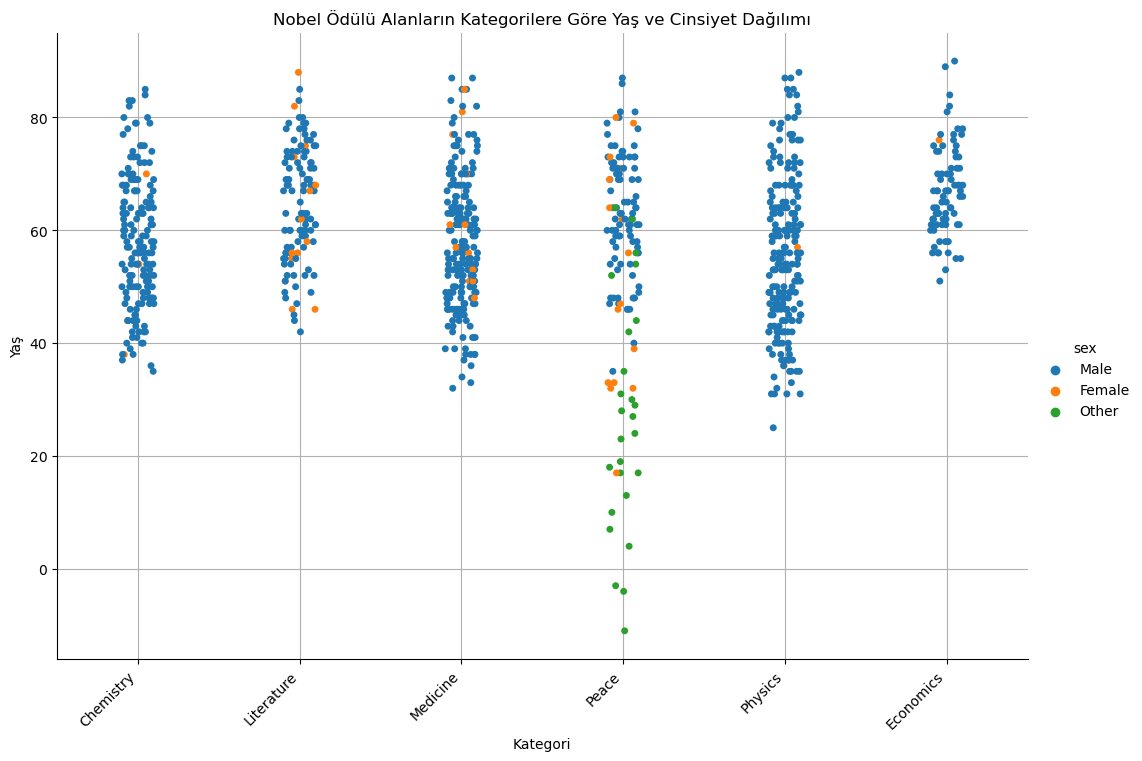

In [53]:

# Yaş hesaplamak için yıldan doğum gününü çıkartıyoruz

df['age'] = df['year'] - df['birth_date'].dt.year

sns.catplot(data=df, x = "category", y = "age",hue="sex",height=7, aspect=1.5)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Kategori')
plt.ylabel('Yaş')
plt.title('Nobel Ödülü Alanların Kategorilere Göre Yaş ve Cinsiyet Dağılımı')
plt.grid(True)
plt.show()

### Yorum:Tüm kategorilerde genelde erkeklerin daha fazla ödül aldığı görülmektedir.Kadınların kendi içinde  ağırlıklı olarak Edebiyat,Tıp,Barış ödüllerini daha çok aldığı görülmüştür.Organizasyonların ağırlıklı olarak Barış kategorisinde ödül aldığı görülmektedir.Erkeklerin Kimya,Fizik,Ekonomi alanlarında üstünlüğü görülmektedir.

In [54]:
#Kontrol ettiğimiz zaman Peace kategorisinde ödül alanların sadece bireysel değil Organizasyon olarak da aldığı tespit edilmiştir.
df.loc[df["sex"]=="Other"].head(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,1873-09-08,Gent,Belgium,Other,NaN,NaN,NaN,NaN,NaN,NaN,31
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,1891-05-22,Bern,Switzerland,Other,NaN,NaN,NaN,NaN,NaN,NaN,19
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1863-02-17,Geneva,Switzerland,Other,NaN,NaN,NaN,NaN,NaN,NaN,54


## - Kategori-Yıl ve Cinsiyet dağılımının incelenmesi

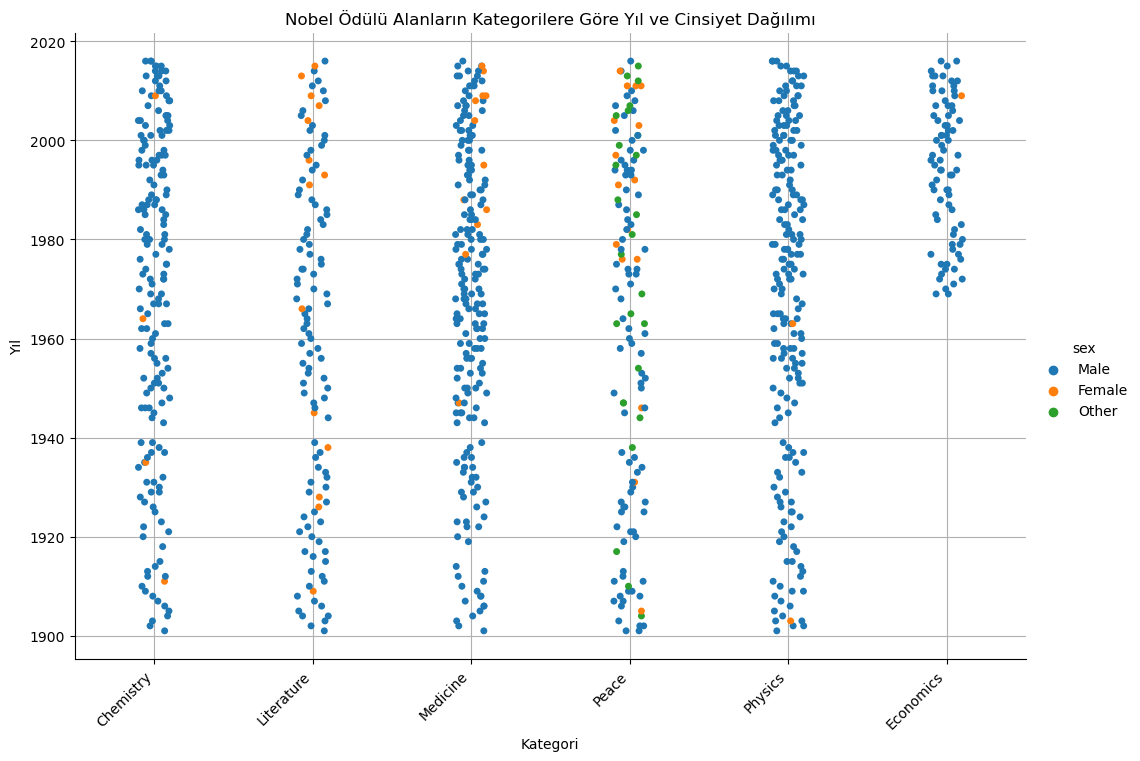

In [55]:
# Yaş hesaplamak için yıldan doğum gününü çıkartıyoruz

df['age'] = df['year'] - df['birth_date'].dt.year


sns.catplot(data=df, x = "category", y = "year",hue="sex",height=7, aspect=1.5)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Kategori')
plt.ylabel('Yıl')
plt.title('Nobel Ödülü Alanların Kategorilere Göre Yıl ve Cinsiyet Dağılımı')
plt.grid(True)
plt.show()

## - Yorum:Yıl ve kategori bazında ödül alanları cinsiyetlerine göre incelediğimizde özellikle Edebiyat,Tıp,Barış kategorilerinde kadınların 1978 yılından sonra ön plana çıktığı görülmektedir.Özellikle bu yıllardan sonra kadınların toplumlarda etkisinin arttığı değerlendirilebilir.

## - Her bir ödül kategorisinin ayrı ayrı incelenmesi

# Chemistry

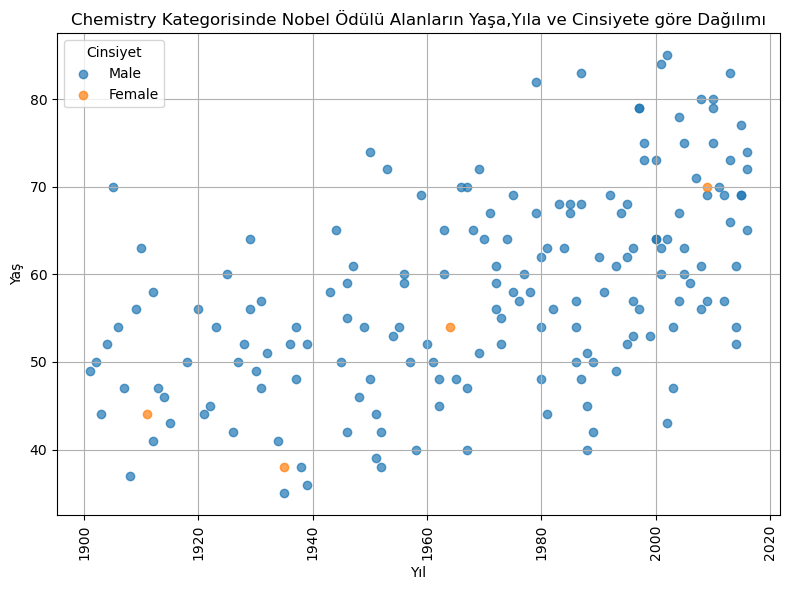

In [56]:
# Sadece Chemistry kategorisi verilerini seçelim
df_chm = df[df["category"] == "Chemistry"]
# Grafikte uyarıları kapatmak için
import warnings
warnings.filterwarnings("ignore")

# Yaşı hesaplamak için yıldan doğum tarihini çıkaralım
df_chm['age'] = df_chm['year'] - df_chm['birth_date'].dt.year

# Matplotlib kullanarak çizelim
plt.figure(figsize=(8, 6))
for sex in df_chm['sex'].unique():
    subset = df_chm[df_chm['sex'] == sex]
    plt.scatter(subset['year'], subset['age'], label=sex, alpha=0.7)

plt.xlabel('Yıl')
plt.ylabel('Yaş')
plt.title("Chemistry Kategorisinde Nobel Ödülü Alanların Yaşa,Yıla ve Cinsiyete göre Dağılımı")
plt.xticks(rotation=90)
plt.legend(title='Cinsiyet')
plt.grid(True)
plt.tight_layout()
plt.show()

## Yorum:Kimya kategorisinde erkeklerin ön planda olduğu görülmektedir.1980 ve 2000 yılları arası Erkeklerin ödüllerin tamamını aldığı görülmüştür.

In [57]:
df.loc[(df["category"]=="Chemistry")&(df["sex"]=="Female")][["full_name","age","year"]]  # veriler kontrol edildi

,full_name,age,year
62,"Marie Curie, née Sklodowska",44,1911
179,Irène Joliot-Curie,38,1935
353,Dorothy Crowfoot Hodgkin,54,1964
818,Ada E. Yonath,70,2009


# Literature

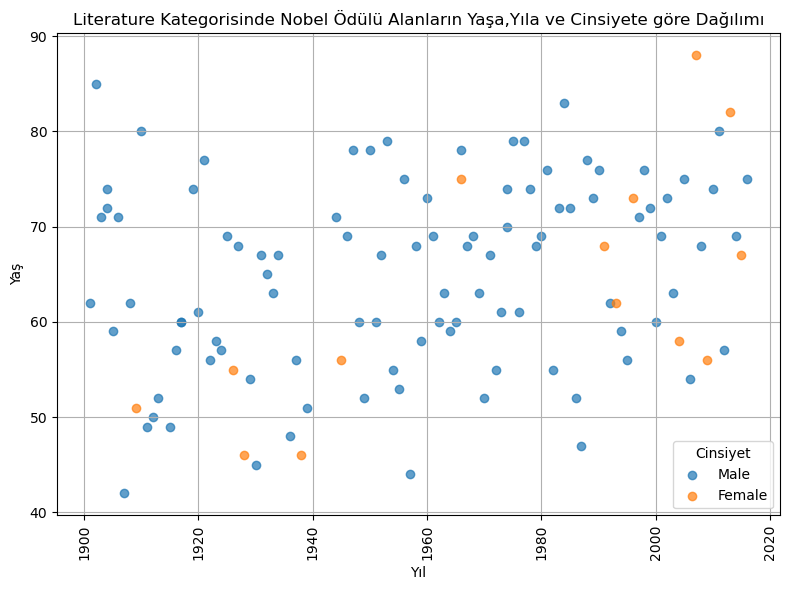

In [58]:
# Sadece Literature kategorisi verilerini seçelim
df_lit = df[df["category"] == "Literature"]
# Grafikte uyarıları kapatmak için
import warnings
warnings.filterwarnings("ignore")



# Yaşı hesaplamak için yıldan doğum tarihini çıkaralım
df_lit['age'] = df_lit['year'] - df_lit['birth_date'].dt.year

# Matplotlib kullanarak çizelim
plt.figure(figsize=(8, 6))
for sex in df_lit['sex'].unique():
    subset = df_lit[df_lit['sex'] == sex]
    plt.scatter(subset['year'], subset['age'], label=sex, alpha=0.7)

plt.xlabel('Yıl')
plt.ylabel('Yaş')
plt.title("Literature Kategorisinde Nobel Ödülü Alanların Yaşa,Yıla ve Cinsiyete göre Dağılımı")
plt.xticks(rotation=90)
plt.legend(title='Cinsiyet')
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
df.loc[(df["category"]=="Literature")&(df["sex"]=="Female")][["full_name","age","year"]]  # veriler kontrol edildi

,full_name,age,year
51,Selma Ottilia Lovisa Lagerlöf,51,1909
128,Grazia Deledda,55,1926
141,Sigrid Undset,46,1928
198,Pearl Buck,46,1938
218,Gabriela Mistral,56,1945
372,Nelly Sachs,75,1966
615,Nadine Gordimer,68,1991
631,Toni Morrison,62,1993
667,Wislawa Szymborska,73,1996
763,Elfriede Jelinek,58,2004


## Yorum:Edebiyat kategorisinde kadınların başarılı olduğu görülmektedir.1980 yılından sonra ödül alan  kadınların yaş ortalamasının arttığı görülmüştür.

# Medicine

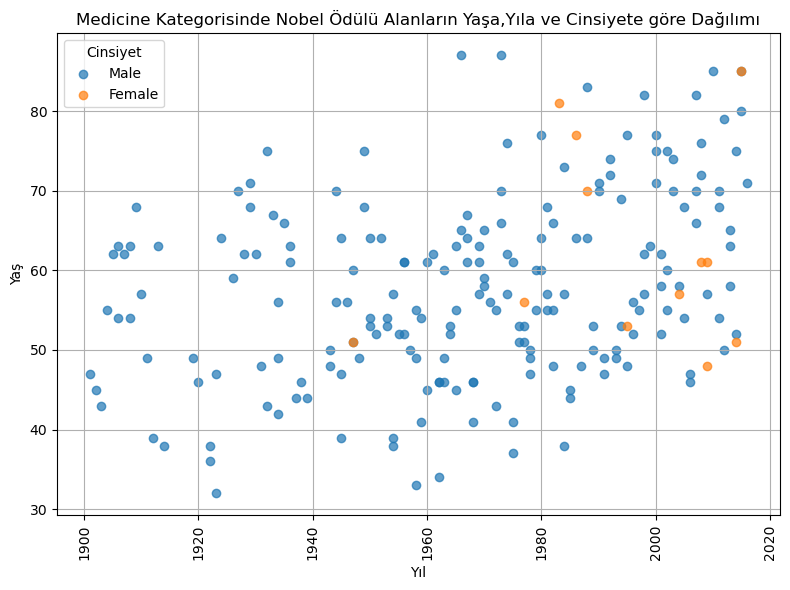

In [60]:
# Sadece medicine kategorisi verilerini seçelim
df_mdc = df[df["category"] == "Medicine"]
# Grafikte uyarıları kapatmak için
import warnings
warnings.filterwarnings("ignore")


# Yaşı hesaplamak için yıldan doğum tarihini çıkaralım
df_mdc['age'] = df_mdc['year'] - df_mdc['birth_date'].dt.year

# Matplotlib kullanarak çizelim
plt.figure(figsize=(8, 6))
for sex in df_mdc['sex'].unique():
    subset = df_mdc[df_mdc['sex'] == sex]
    plt.scatter(subset['year'], subset['age'], label=sex, alpha=0.7)

plt.xlabel('Yıl')
plt.ylabel('Yaş')
plt.title("Medicine Kategorisinde Nobel Ödülü Alanların Yaşa,Yıla ve Cinsiyete göre Dağılımı")
plt.xticks(rotation=90)
plt.legend(title='Cinsiyet')
plt.grid(True)
plt.tight_layout()
plt.show()

In [61]:
df.loc[(df["category"]=="Medicine")&(df["sex"]=="Female")][["full_name","age","year"]] # veriler kontrol edildi

,full_name,age,year
235,"Gerty Theresa Cori, née Radnitz",51,1947
478,Rosalyn Yalow,56,1977
539,Barbara McClintock,81,1983
566,Rita Levi-Montalcini,77,1986
586,Gertrude B. Elion,70,1988
656,Christiane Nüsslein-Volhard,53,1995
765,Linda B. Buck,57,2004
810,Françoise Barré-Sinoussi,61,2008
822,Elizabeth H. Blackburn,61,2009
823,Carol W. Greider,48,2009


### Yorum:Tıp kategorisinde ağırlıklı olarak erkeklerin ödül aldıkları görülmüştür.Kadınların ödül sayısındaki artış özellikle 1980 yılından sonra artmıştır.Ödül alan kadınların yaş ortalamasının 50  yaş üstü olduğu gözlemlenmiştir

# Peace

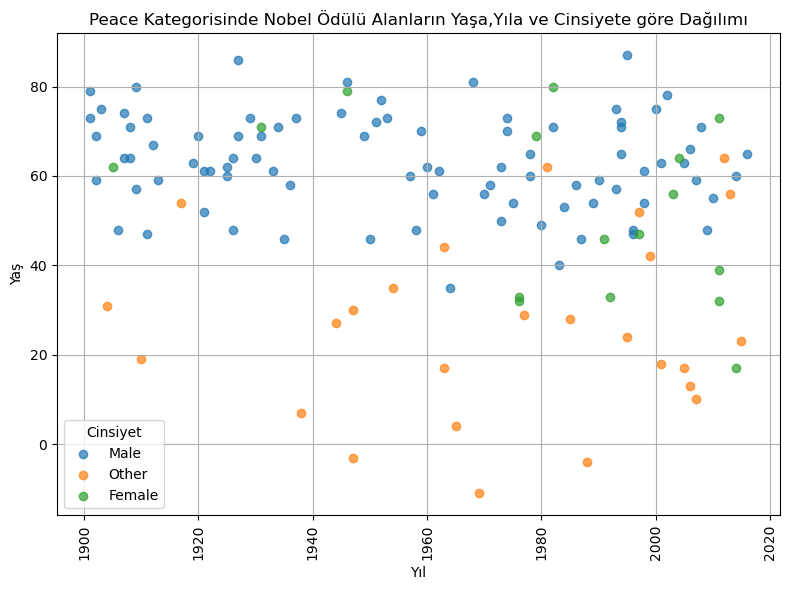

In [62]:
# Sadece Peace kategorisi verilerini seçelim
df_pea = df[df["category"] == "Peace"]
# Grafikte uyarıları kapatmak için
import warnings
warnings.filterwarnings("ignore")




# Yaşı hesaplamak için yıldan doğum tarihini çıkaralım
df_pea['age'] = df_pea['year'] - df_pea['birth_date'].dt.year

# 'sex' sütunundaki NaN değerleri filtreleyelim
df_pea = df_pea[df_pea['sex'].notna()]

# Matplotlib kullanarak çizelim
plt.figure(figsize=(8, 6))
for sex in df_pea['sex'].unique():
    subset = df_pea[df_pea['sex'] == sex]
    plt.scatter(subset['year'], subset['age'], label=sex, alpha=0.7)

plt.xlabel('Yıl')
plt.ylabel('Yaş')
plt.title("Peace Kategorisinde Nobel Ödülü Alanların Yaşa,Yıla ve Cinsiyete göre Dağılımı")
plt.xticks(rotation=90)
plt.legend(title='Cinsiyet')
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
df.loc[(df["category"]=="Peace")&(df["sex"]=="Female")][["full_name","age","year"]] # veriler kontrol edildi

,full_name,age,year
29,"Baroness Bertha Sophie Felicita von Suttner, n...",62,1905
160,Jane Addams,71,1931
229,Emily Greene Balch,79,1946
468,Betty Williams,33,1976
469,Mairead Corrigan,32,1976
501,Mother Teresa,69,1979
533,Alva Myrdal,80,1982
618,Aung San Suu Kyi,46,1991
625,Rigoberta Menchú Tum,33,1992
683,Jody Williams,47,1997


### Yorum:Barış kategorisinde ödüllerin bir kısmını organizasyonlar almıştır.40 yaş altı ödül alanların çoğunun kadın olduğu görülmüştür.En genç ödül alan kişi olan Malala Yousafzai nin 17  yaşında olduğu görülmüştür.

# Physics

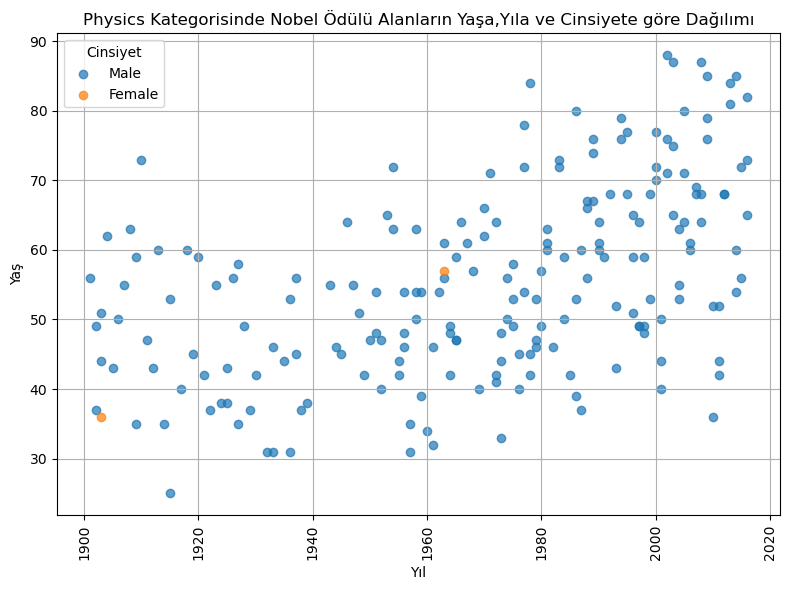

In [64]:
# Sadece Physics kategorisi verilerini seçelim
df_phy = df[df["category"] == "Physics"]
# Grafikte uyarıları kapatmak için
import warnings
warnings.filterwarnings("ignore")


# Yaşı hesaplamak için yıldan doğum tarihini çıkaralım
df_phy['age'] = df_phy['year'] - df_phy['birth_date'].dt.year

# Matplotlib kullanarak çizelim
plt.figure(figsize=(8, 6))
for sex in df_phy['sex'].unique():
    subset = df_phy[df_phy['sex'] == sex]
    plt.scatter(subset['year'], subset['age'], label=sex, alpha=0.7)

plt.xlabel('Yıl')
plt.ylabel('Yaş')
plt.title("Physics Kategorisinde Nobel Ödülü Alanların Yaşa,Yıla ve Cinsiyete göre Dağılımı")
plt.xticks(rotation=90)
plt.legend(title='Cinsiyet')
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
df.loc[(df["category"]=="Physics")&(df["sex"]=="Female")][["full_name","age","year"]] #kontrol edildi

,full_name,age,year
19,"Marie Curie, née Sklodowska",36,1903
351,Maria Goeppert Mayer,57,1963


### Yorum:Fizik alanında ödül alanların çoğunun erkek olduğu gözlemlenmiştir.Özellikle 1960 yılından sonra bu kategoride ödül alanların yaşlarında bir artış gözlemlenmiştir.1980 yılından sonra 60 yaş üzeri ödül alanlar bu yıllar arası ödül alanların hemen hemen yarısı olduğu görülmüştür.Bunun nedeni araştırma-geliştirme alanlarında yapılan çalışmaların düzenli olarak yapılmaya başladığı değerlendirilebilir.

# Economics

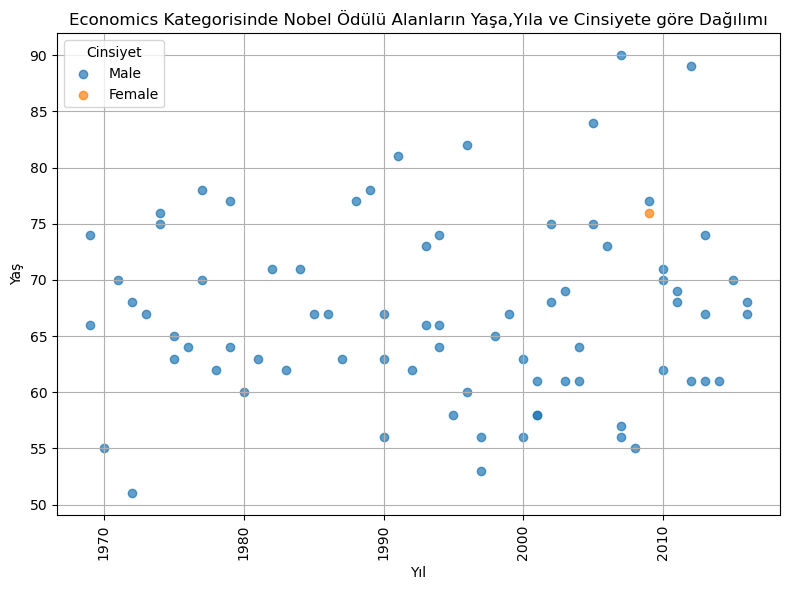

In [66]:
# Sadece Economics kategorisi verilerini seçelim
df_eco = df[df["category"] == "Economics"]
# Grafikte uyarıları kapatmak için
import warnings
warnings.filterwarnings("ignore")


# Yaşı hesaplamak için yıldan doğum tarihini çıkaralım
df_eco['age'] = df_eco['year'] - df_eco['birth_date'].dt.year

# Matplotlib kullanarak çizelim
plt.figure(figsize=(8, 6))
for sex in df_eco['sex'].unique():
    subset = df_eco[df_eco['sex'] == sex]
    plt.scatter(subset['year'], subset['age'], label=sex, alpha=0.7)

plt.xlabel('Yıl')
plt.ylabel('Yaş')
plt.title("Economics Kategorisinde Nobel Ödülü Alanların Yaşa,Yıla ve Cinsiyete göre Dağılımı")
plt.xticks(rotation=90)
plt.legend(title='Cinsiyet')
plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
df.loc[(df["category"]=="Economics")&(df["sex"]=="Female")][["full_name","age","year"]] # veriler kontrol edildi

,full_name,age,year
819,Elinor Ostrom,76,2009


### Yorum:Ekonomi alanınnda bir tane ödül alan kadın bulunmaktadır.Bu alanda ödül alanların büyük kısmının 60 ya ile 75 yaş arasında toplandığını söyleyebilriz.

# ---------------------------------------------------------------------------------------------------------

# 6. 1938-1945 yılı arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.

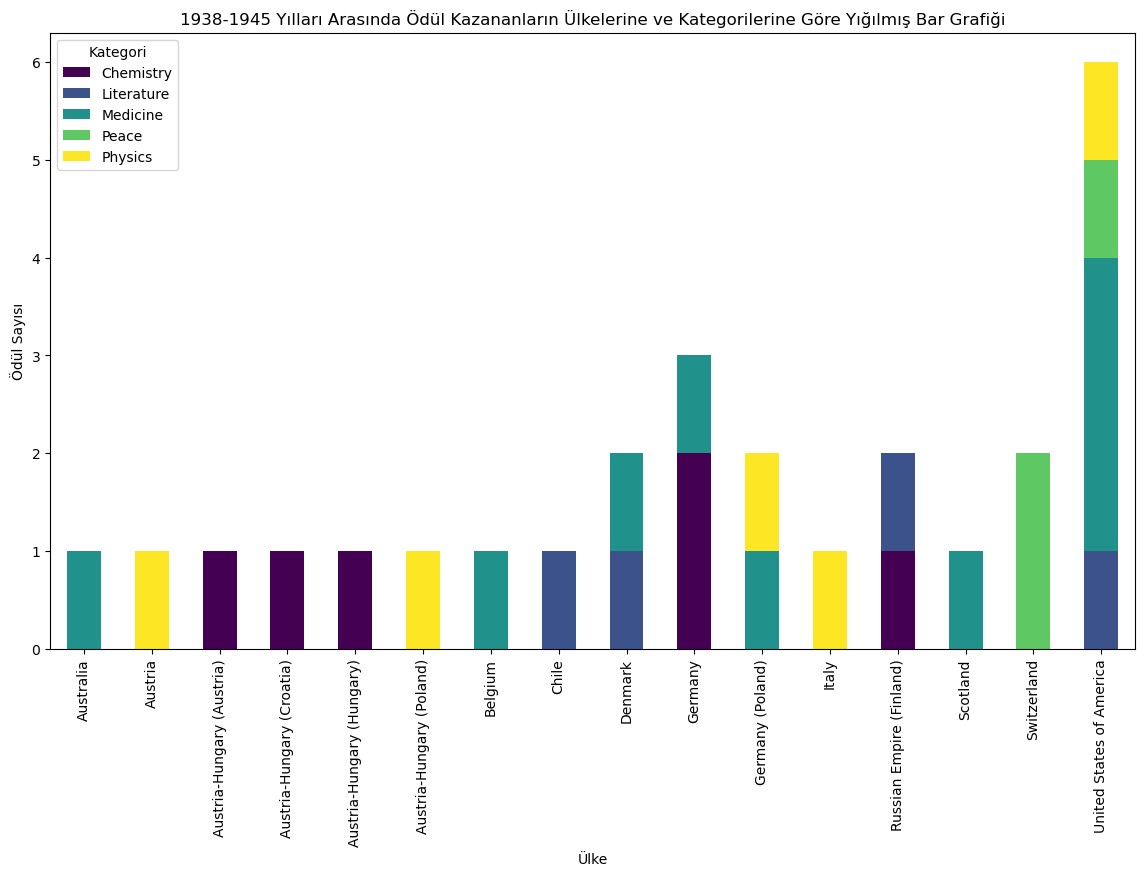

In [68]:

# 1938 ile 1945 yılları arasında ödül kazananların filtrelenmesi
df_ranges = df.loc[(df["year"] >= 1938) & (df["year"] <= 1945)]


total_data = df_ranges.groupby(['birth_country', 'category']).size().unstack(fill_value=0)

# Grafik oluşturma
total_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('1938-1945 Yılları Arasında Ödül Kazananların Ülkelerine ve Kategorilerine Göre Yığılmış Bar Grafiği')
plt.xlabel('Ülke')
plt.ylabel('Ödül Sayısı')
plt.xticks(rotation=90)
plt.legend(title='Kategori')
plt.show()


In [69]:
total_data.tail()# United states of America verileri kontrol amaçlı tablodan kontrol edildi.

category,Chemistry,Literature,Medicine,Peace,Physics
birth_country,,,,,
Italy,0,0,0,0,1
Russian Empire (Finland),1,1,0,0,0
Scotland,0,0,1,0,0
Switzerland,0,0,0,2,0
United States of America,0,1,3,1,1


### Yorum:Farklı kategorilerden en çok ödül alan ülkenin United States of America olduğu görülmektedir.Savaşın Tıp  kategorisindeki çalışmalara olumlu etkisi olmuş olabilir.

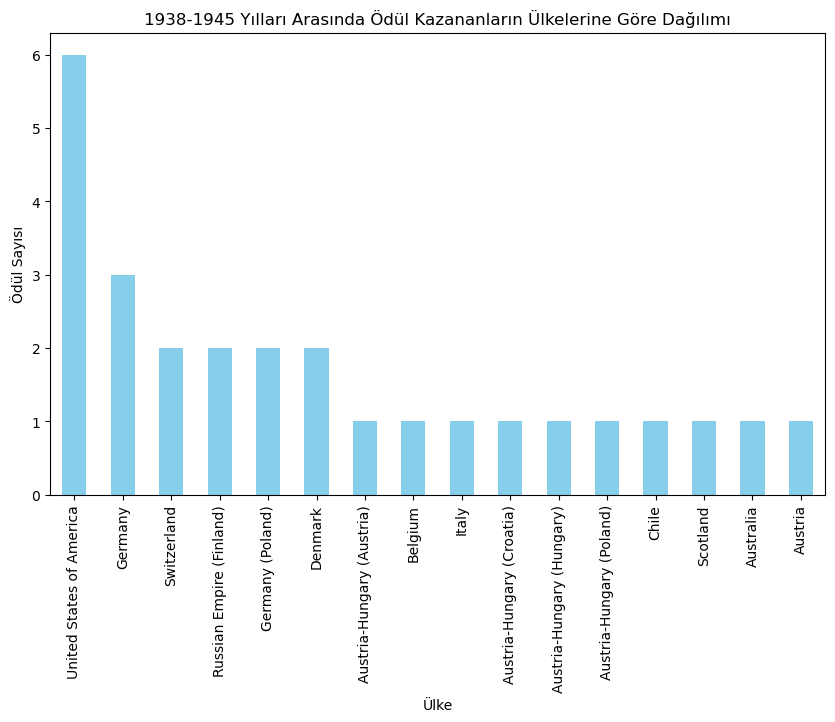

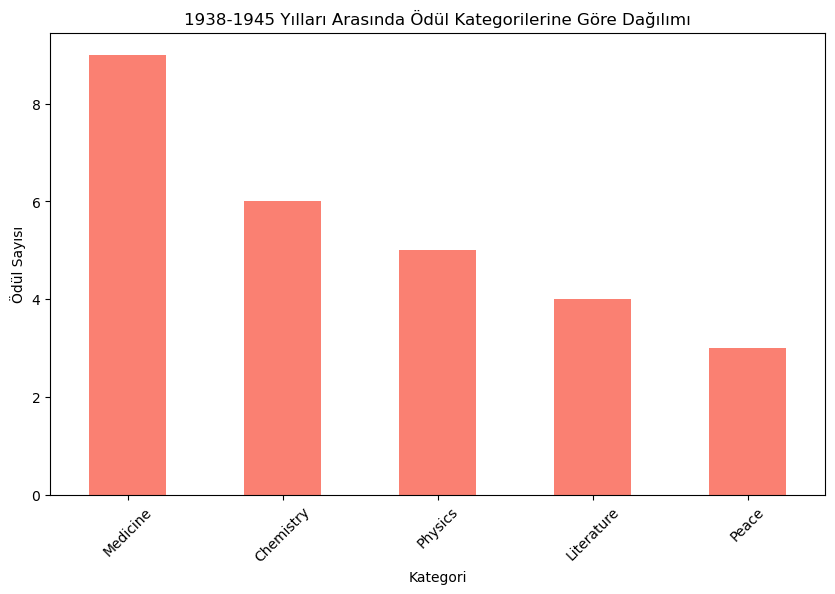

In [70]:

# 1938 ile 1945 yılları arasında ödül kazananların filtrelenmesi
df_ranges = df.loc[(df["year"] >= 1938) & (df["year"] <= 1945)]

# Ödül kazananların ülkelerine göre dağılımı
country_counts = df_ranges['birth_country'].value_counts()

plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('1938-1945 Yılları Arasında Ödül Kazananların Ülkelerine Göre Dağılımı')
plt.xlabel('Ülke')
plt.ylabel('Ödül Sayısı')
plt.xticks(rotation=90)
plt.show()

# Ödül kategorilerine göre dağılımı
category_counts = df_ranges['category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='salmon')
plt.title('1938-1945 Yılları Arasında Ödül Kategorilerine Göre Dağılımı')
plt.xlabel('Kategori')
plt.ylabel('Ödül Sayısı')
plt.xticks(rotation=45)
plt.show()


### Yorum:1938-1945 yılları arasında Avrupadaki savaşın Amerika birleşik devletleri için bir avantaj olduğu değerlendirilmiştir.En çok ödül alınan kategori Tıp kategorisi olmuştur.En az ödül alınan kategori Barış kategorisidir.İkinci dünya savaşının Tıp kategorisindeki ödüllere etkisinin olabileceği değerlendirilmiştir.Dikkatimi çeken bir diğer nokta Fransa'nın genel olarak nobel ödülü alan başarılı bir ülke olmasına rağmen 1938-1945 yılları arası hiç ödül alamamış olmasıdır.Bunun nedeni İkinci dünya savaşında Almanya tarafından işgal edilmiş olması olabilir.

# -------------------------------------------------------------------------------------------------------

# 7. 1947-1991 yılları arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.(Her kategori için ayrı bir grafik olması istenmektedir)


In [71]:
df_ranges = df.loc[(df["year"] >= 1947) & (df["year"] <= 1991)]

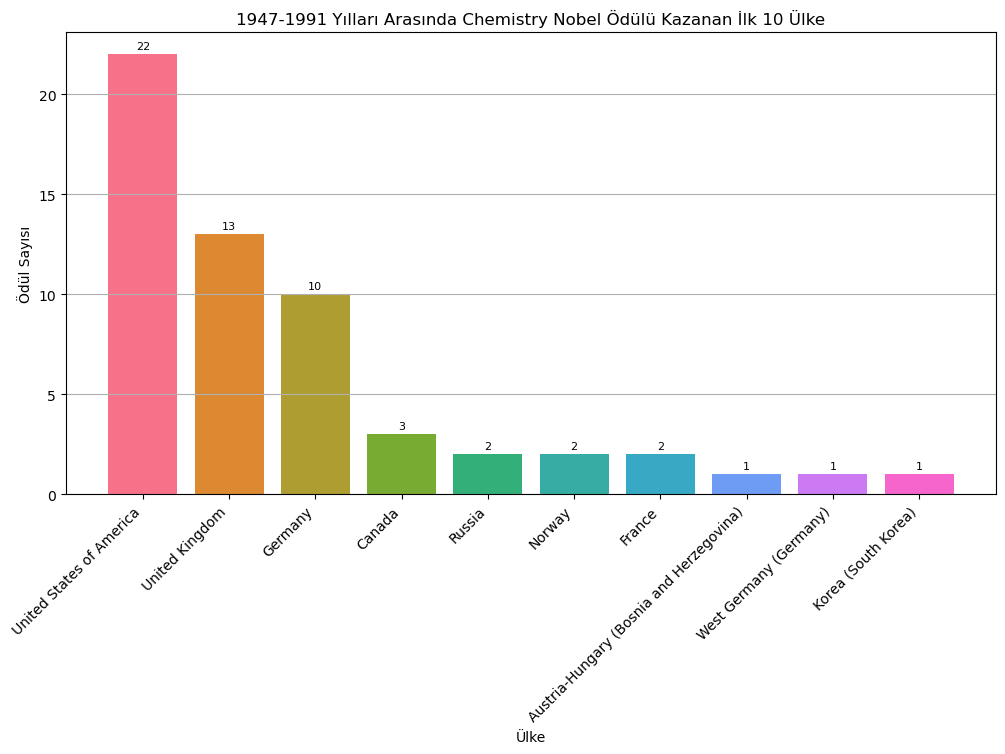

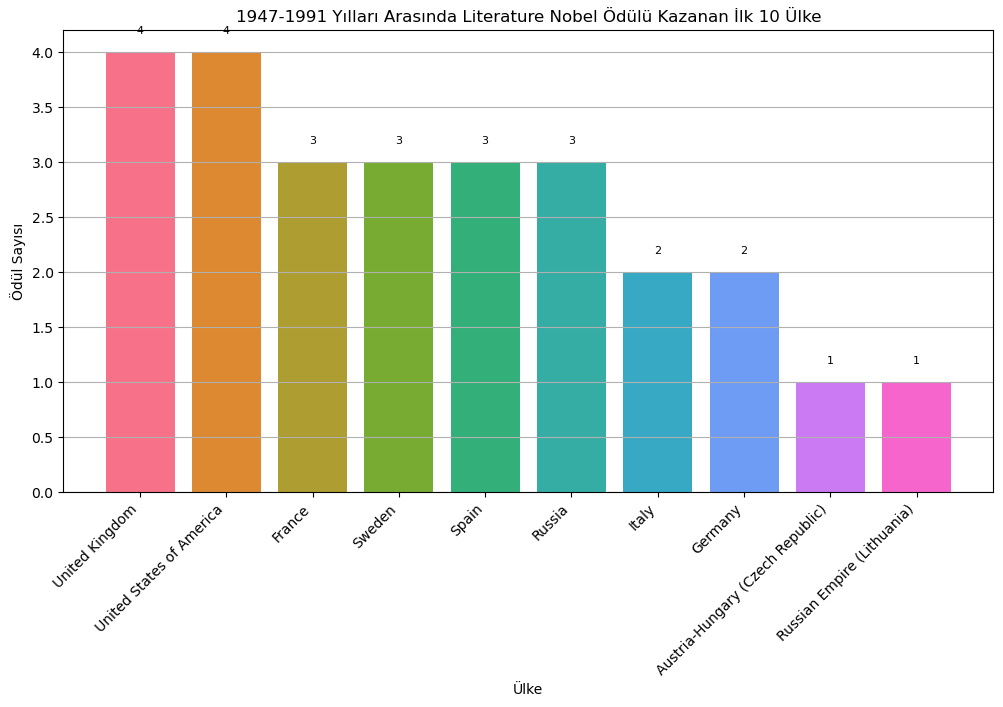

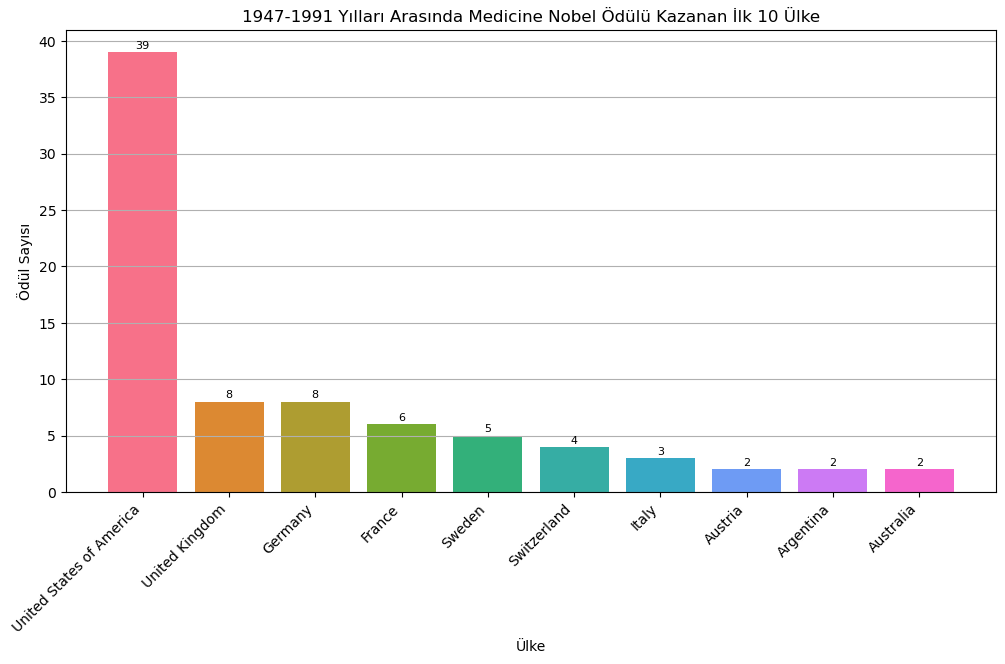

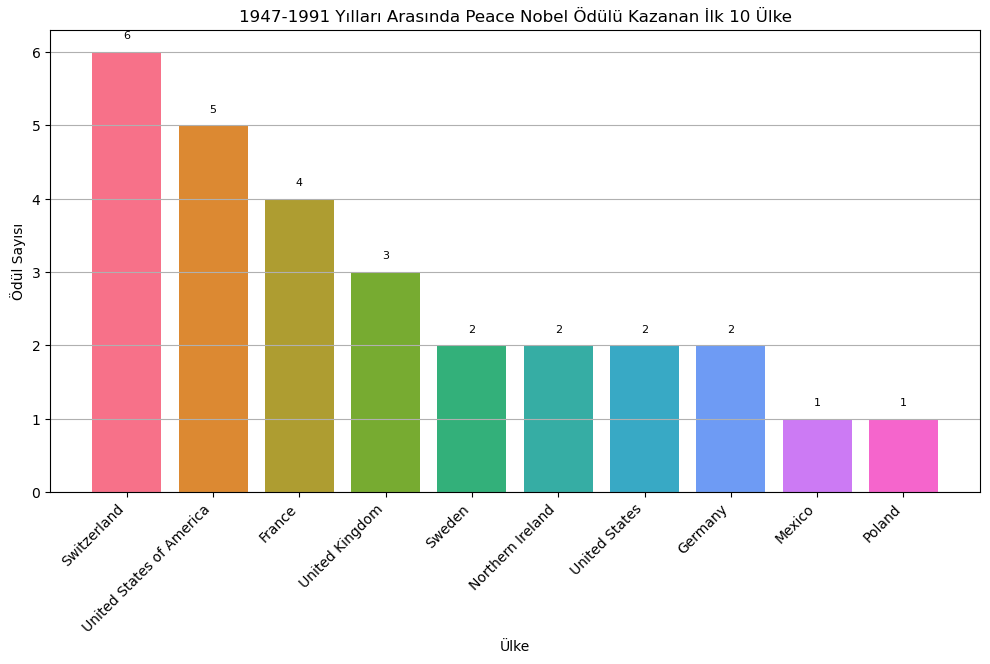

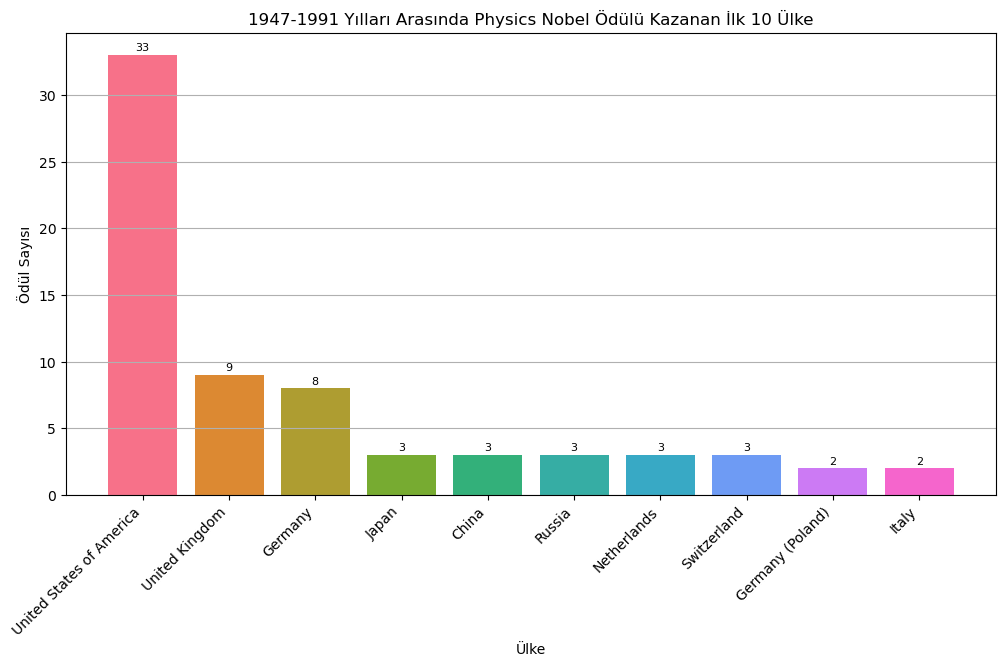

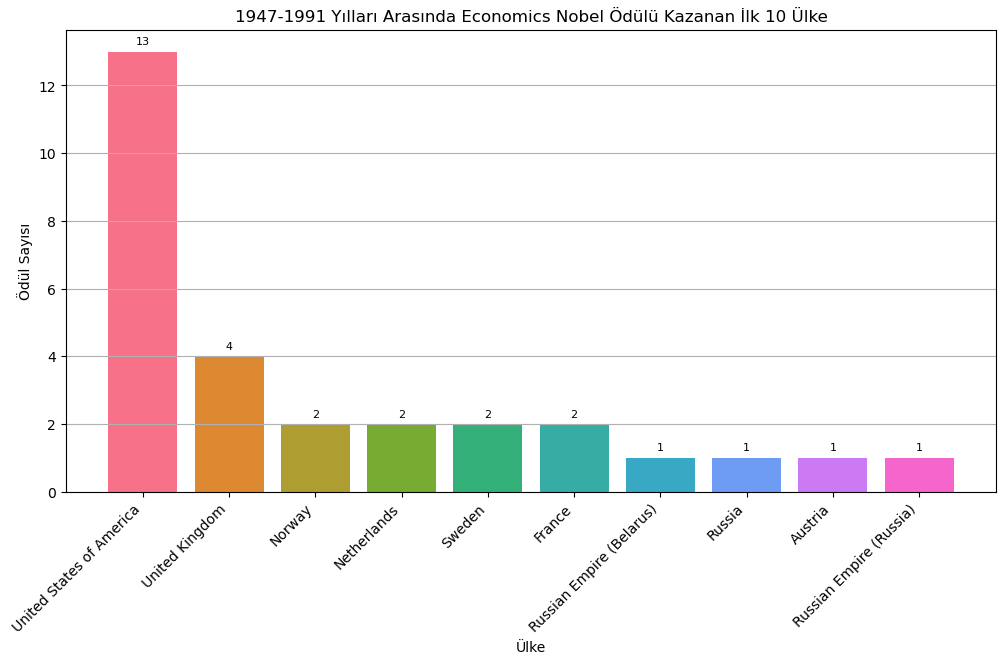

In [72]:


# Her kategori için ayrı grafik çiziyoruz
categories = df_ranges['category'].unique()
for category in categories:
    # Belirli bir kategoriye ait verileri alıyoruz
    category_df = df_ranges[df_ranges['category'] == category]
    
    # Ülke bazında ödül sayılarını hesapladık ve ilk 10 ülkeyi aldık
    country_counts = category_df['birth_country'].value_counts().head(10)
    countries = country_counts.index.tolist()  # Ülkelerin isimleri
    counts = country_counts.tolist()  # Ödül sayıları
    
    # Seaborn renk paletlerinden birini kullanalım
    colors = sns.color_palette("husl", len(countries))
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(countries, counts, color=colors)
    
    # Her barın üzerine ödül sayısını yazdırıyoruz
    for bar, count in zip(bars, counts):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.15, count, ha='center', va='bottom', fontsize=8)
    
    # Grafik başlığı ve eksen isimleri
    plt.title(f'1947-1991 Yılları Arasında {category} Nobel Ödülü Kazanan İlk 10 Ülke')
    plt.xlabel('Ülke')
    plt.ylabel('Ödül Sayısı')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    
    plt.show()

### Yorum:1947-1991 tarihleri arası farklı kategorilerde Amerika ve İngilterenin üstünlükleri görülüyor.Tıp,Fizik ve Ekonomi kategorilerinde Amerikanın rakiplerine büyük fark attığı görülüyor.Özellikle Tıp kategorisinde Amerika rakiplerine ezici bir üstünlük sağlıyor.Amerika birleşik devletleri özellikle Tıp alanındaki araştırmalara ciddi yatırım yapmış olabilir.İkinci dünya savaşından sonra bilim adamlarının Amerikaya göç etmelerinin etkisini görebiliyoruz.Genel de her kategoride ödül alan ülke olan İngilterenin Barış kategorisinde ödül alamadığı gözlemlendi

# ---------------------------------------------------------------------------------------------------------

# 8. Kimya, Edebiyat, Barış, Fizik ve Tıp kategorilerindeki 2000 sonrasındaki kişilerin ülkelerini, yaşlarını görselleştirin.(Her bir Kategori için ayrı görselleştirme yapılması istenmektedir) Veriyi yorumlayınız.

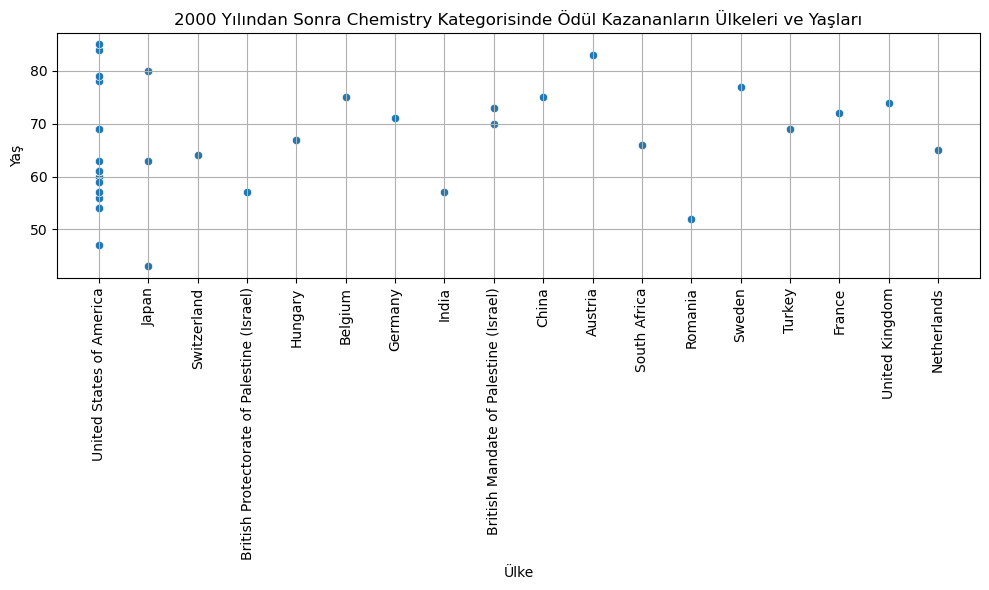

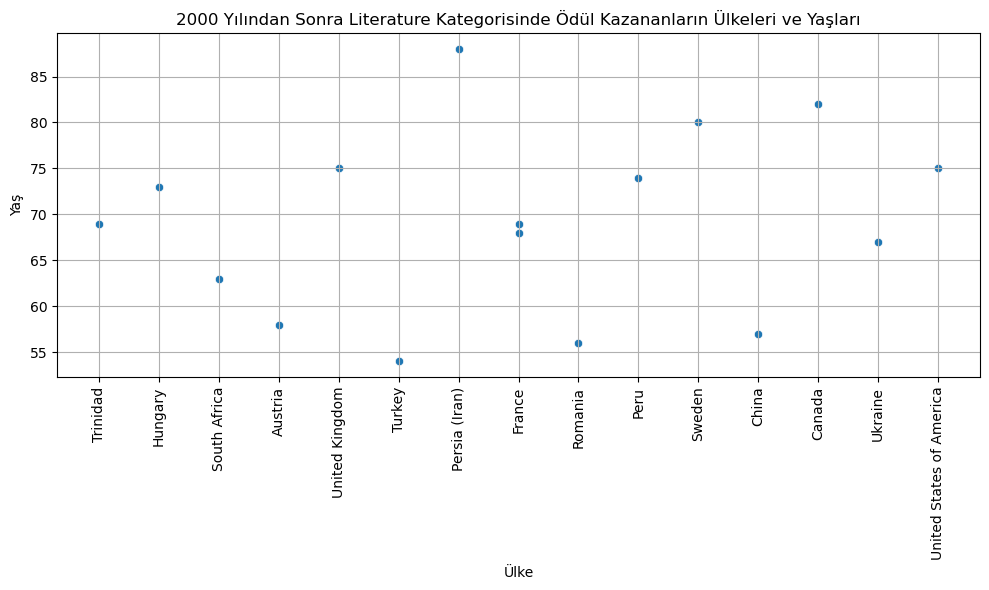

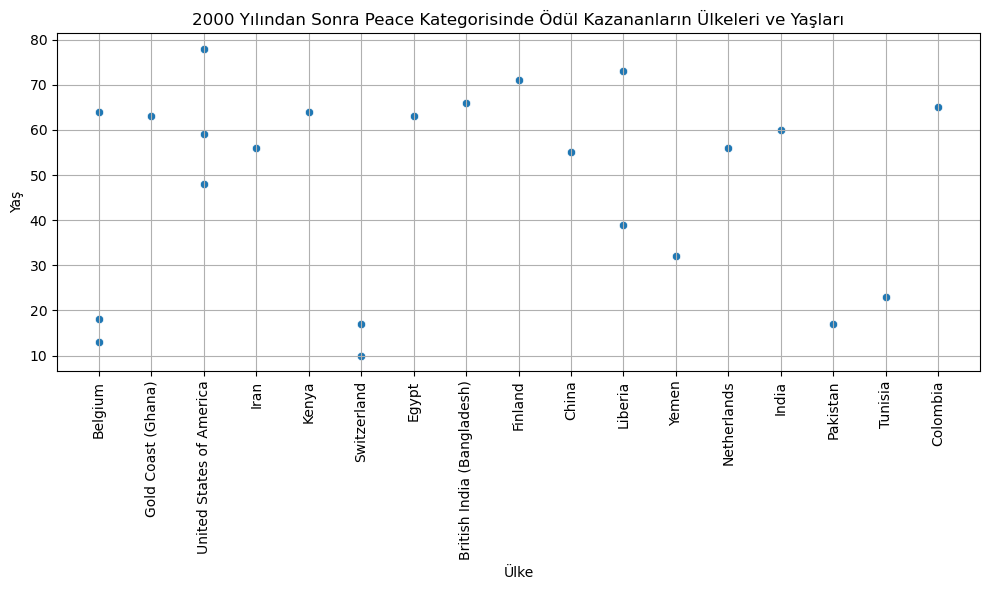

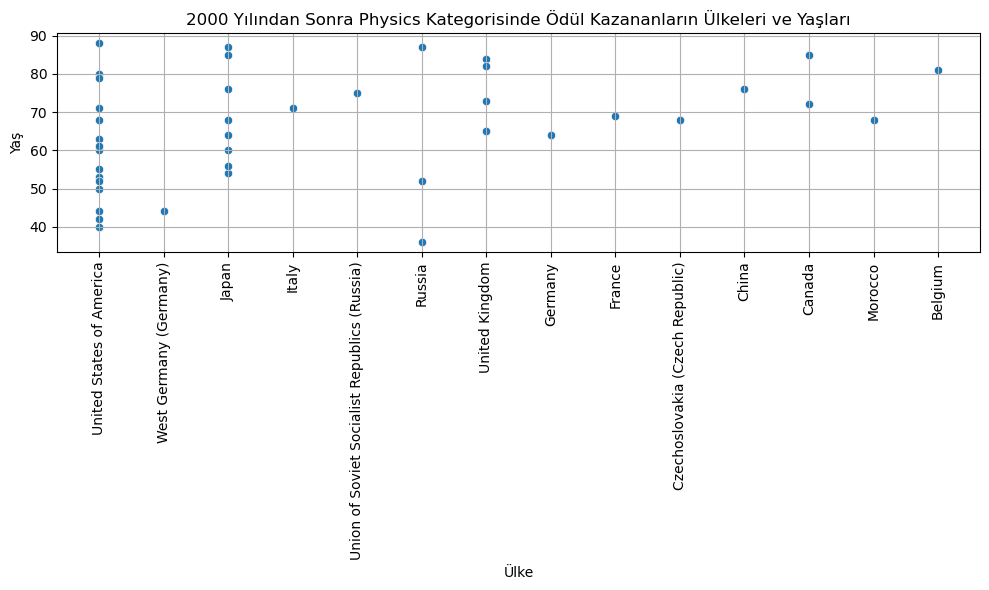

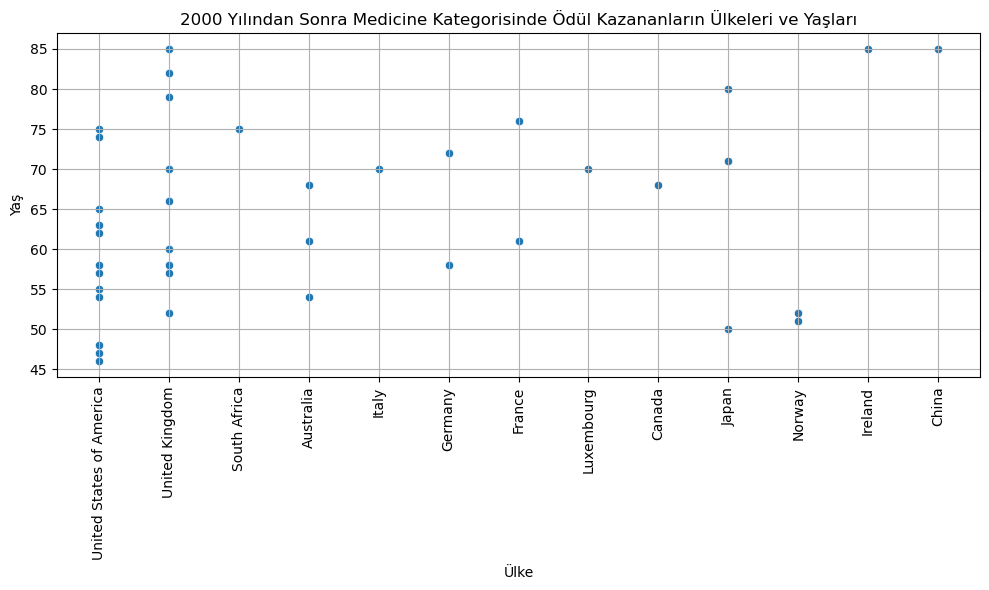

In [73]:



# 2000 yılından sonra ödül kazananların filtrelenmesi
df_2000_after = df.loc[df['year'] > 2000]

# İlgili kategorilerin filtrelenmesi
categories_of_interest = ['Chemistry', 'Literature', 'Peace', 'Physics', 'Medicine']
df_filtered = df_2000_after[df_2000_after['category'].isin(categories_of_interest)]

# Yaş hesaplamak için yıldan doğum yılını çıkarma
df_filtered['birth_date'] = pd.to_datetime(df_filtered['birth_date'])
df_filtered['age'] = df_filtered['year'] - df_filtered['birth_date'].dt.year

# Her bir kategori için ayrı grafik oluşturma
for category in categories_of_interest:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='birth_country', y='age', data=df_filtered[df_filtered['category'] == category])
    plt.title(f'2000 Yılından Sonra {category} Kategorisinde Ödül Kazananların Ülkeleri ve Yaşları')
    plt.xlabel('Ülke')
    plt.ylabel('Yaş')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.grid(True)  # Grid çizgilerini eklemek için
    plt.show()


### Yorum:
### - Kimya kategorisinde Amerika en çok ödül alan ülke olarak göze çarpıyor.İkinci sırada japonya görülüyor.Japonyanın 2000 yılından sonra ödüllerindeki artış dikkat çekiyor.Kimya kategorisinde ödül alanlarının yaşları 60 ve 75 yaş arasında ağırlıkla toplandığı görülmüştür.
### - Edebiyat kategorisinde Fransa 2 ödül almış diğer ülkeler 1 er ödül almıştır.Ödül alanların yaşlarının 55 ile 80 yaş arasında dağıldığı yaş ortalmasının bir yerde yığılmadığı görülmüştür.
### - Barış kategorisinde Amerika Birleşik Devletleri nin 3 Liberianın 2 diğer ülkelerin 1 er ödül aldığı görülmüştür.Ödül alanların genellikle 45 yaş ile 70 yaş arası olduğu görülmüştür.Malala Yousafzai	adlı 17 yaşında genç bir kadının 	2014 yılında ödül alması dikkat çekmektedir.
### - Fizik kategorisinde en çok ödül alan ülkeler Amerika Birleşik Devletleri,Japonya ve İngilteredir.Genç bilimadamlarının ödül kazandığı ülkeler incelendiğinde Amerika ve Rusya dikkat çekiyor.
### -Sağlık kategorisi incelendiğinde Amerika Birleşik Devletleri ve İngilterenin rakiplerine oranla uzak ara önde olduğu görülmektedir.Ödü alanların yaşları incelendiğinde ağırlıklı olarak 55 ve 75 yaşları arasında toplandıkları görülüyor.